# 3. Clustering
## After our analysis of the data we must now cluster the data accordingly
Importing approriate libraries

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'pandas'

### First, we read in our data

In [53]:
index95 = pd.read_csv('data/index_95.csv')
index100 = pd.read_csv('data/index_100.csv')
index150 = pd.read_csv('data/index_150.csv')
win95 = pd.read_csv('data/wi_95.csv')
win100 = pd.read_csv('data/wi_100.csv')
win150 = pd.read_csv('data/wi_150.csv')
loss95 = pd.read_csv('data/lo_95.csv')
loss100 = pd.read_csv('data/lo_100.csv')
loss150 = pd.read_csv('data/lo_150.csv')
choice95 = pd.read_csv('data/choice_95.csv')
choice100 = pd.read_csv('data/choice_100.csv')
choice150 = pd.read_csv('data/choice_150.csv')

Cleaned data from processing

In [54]:
cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')

In [55]:
cleaned95.head()

,Margin,Most Common Choice Picked,Most Common Choice,Study,Average Choice
Subj_1,1150,71,4,Fridberg,3.400000
Subj_2,-675,33,4,Fridberg,2.568421
Subj_3,-750,38,4,Fridberg,2.778947
Subj_4,-525,38,4,Fridberg,2.810526
Subj_5,100,46,4,Fridberg,3.021053


Initially, I decided to cluster based on the profit/loss margin for each subject and their most common choice. However, the most common choice would limit the clusters greatly I felt. There would only be 4 possible values (1,2,3 or 4) and this would limit what we could learn from the approriate cluster analysis. I looked into clustering on the number of times each deck was selected but this would involve multiple clusters, one for each choice against the profit margin but I decided against it. This lead me to going back to my data processing and creating the average choice column to add to my data. This was the sum of all the subjects selection divided by the number of trials and I felt this would provide better cluster analysis as a result as there would be far more variety in the range of values.

## K-Means analysis 

In [68]:
kmeans_margin_choice_95 = KMeans(n_clusters=3).fit(cleaned95[["Margin", "Average Choice"]])
centroids_betas95 = kmeans_margin_choice_95.cluster_centers_

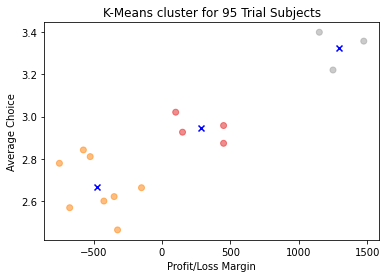

In [69]:
plt.scatter(cleaned95['Margin'], cleaned95['Average Choice'], c= kmeans_margin_choice_95.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas95[:, 0], centroids_betas95[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 95 Trial Subjects')
plt.xlabel('Profit/Loss Margin')
plt.ylabel('Average Choice')
plt.show()

From our cluster analysis here of the 95 trial experiments, it is interesting to note in the Fridberg study the cluster which had the highest average choice also made the most money by a significant distance. K = 3 is certainly the optimal number of clusters here as they are very much pre-defined and easy to distinguish by looking at the scatter plot. We will now try to look at respective studies in a scatter plot and try to compare them with our K-means clusters to see if we can detect trends with regards to profitable studies or unprofitable studies. To do this we may need to create another column in our dataframes. We will have to number the studies accordingly with 0 being the Fridberg study and iterate through them. This way we can get some interesting comparisons between the K-means clustering and actual scatter plots.

In [59]:
replacements = {
  r'Fridberg': 0
}

cleaned95['StudyNumber'] = cleaned95.Study.replace(replacements, regex=True)

We can't tell a lot from this K-means vs Study analysis. The subjects in this dataset are all from the one Fridberg study. This leaves us to move on and check the other datasets for K-means vs study analysis.

In [70]:
kmeans_margin_choice100 = KMeans(n_clusters=3).fit(cleaned100[["Margin", "Average Choice"]])
centroids_betas_100 = kmeans_margin_choice100.cluster_centers_

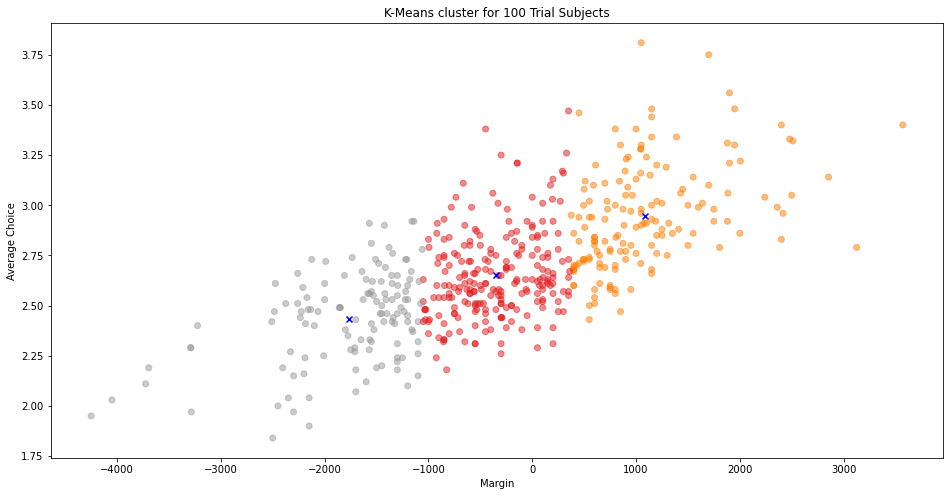

In [71]:
plt.figure(figsize=(16,8))
plt.scatter(cleaned100['Margin'], cleaned100['Average Choice'], c= kmeans_margin_choice100.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_100[:, 0], centroids_betas_100[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 100 Trial Subjects')
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.show()

This graph is slightly harder to tell how many clusters is ideal with far more subjects to choose from. K=3 seems a reasonable selection once again however.

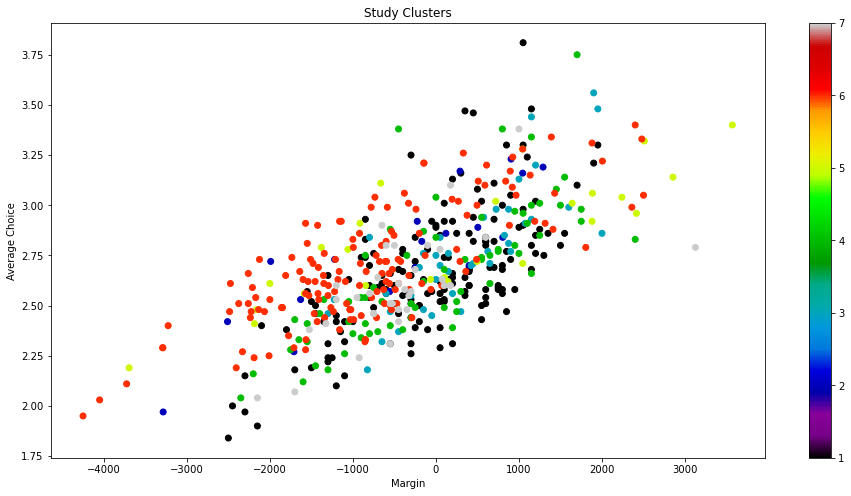

In [11]:
replacements100 = {
  r'Horstmann': 1,
  r'Kjome': 2,
  r'Maia': 3,
  r'SteingroverInPrep': 4,
  r'Premkumar': 5,
  r'Wood': 6,
  r'Worthy': 7  
}

cleaned100['StudyNumber'] = cleaned100.Study.replace(replacements100, regex=True)
plt.figure(figsize=(16,8))
plt.scatter(cleaned100['Margin'], cleaned100['Average Choice'], c=cleaned100['StudyNumber'], cmap="nipy_spectral")
plt.title("Study Clusters")
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.colorbar()

### Analysis of scatter plots for 100 trial studies
Using our colour bar we can deduce the clusters from what study they are a part of. If we look at the cluster to the left in our k-means scatter plot we can see that a substantial amount of this cluster contains subjects from the Wood et al study. It is interesting to note this had the highest mean average age of any study in the datasets. It also had a large number of participants but looking at the scatter plot very few participants made money over the course of the trials. The majority had an average choice of below 3 and certainly fell into the category of average lower choice and lower financial gain. This study also features heavily in the second cluster (the one most central) and this cluster also contains subjects who struggled to break even. The Horstmann study also features heavily in this cluster as does the Worthy study in yellow. The Worthy study leans more towards the first cluster again in the lower choice average, lower money made category. It is interesting to note that this study does not explicitly state the age demography of the group studied but tells us it was a solely female, undergraduate student study, which hints at it being a younger age group. In the third cluster to the right, which is the higher average choice, higher profit group we can see a large mix of groups with comparatively less subjects in this cluster compared to the other two. We can see a significant amount of subjects from the Maia study and also quite a few from the previously mentioned Horstmann study. We also see even with a small sample size from the study there is a significant number of Premkumar participants in this profitable cluster. Two of these studies contain a very young mean age again. The Maia study is another that focuses on undergraduate students again, but with better results than previous. 

In [72]:
kmeans_margin_choice150 = KMeans(n_clusters=3).fit(cleaned150[["Margin", "Average Choice"]])
centroids_betas_150 = kmeans_margin_choice150.cluster_centers_

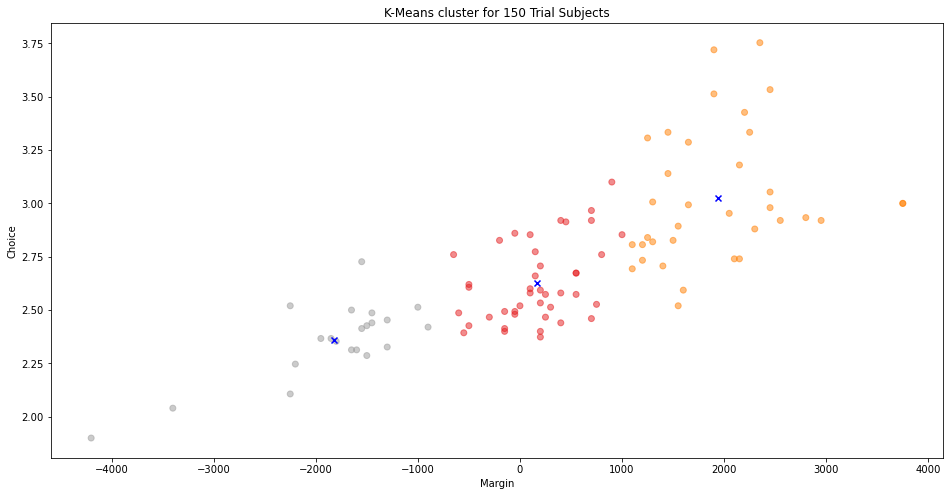

In [73]:
plt.figure(figsize=(16,8))
plt.scatter(cleaned150['Margin'], cleaned150['Average Choice'], c= kmeans_margin_choice150.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_150[:, 0], centroids_betas_150[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for 150 Trial Subjects')
plt.xlabel('Margin')
plt.ylabel('Choice')
plt.show()

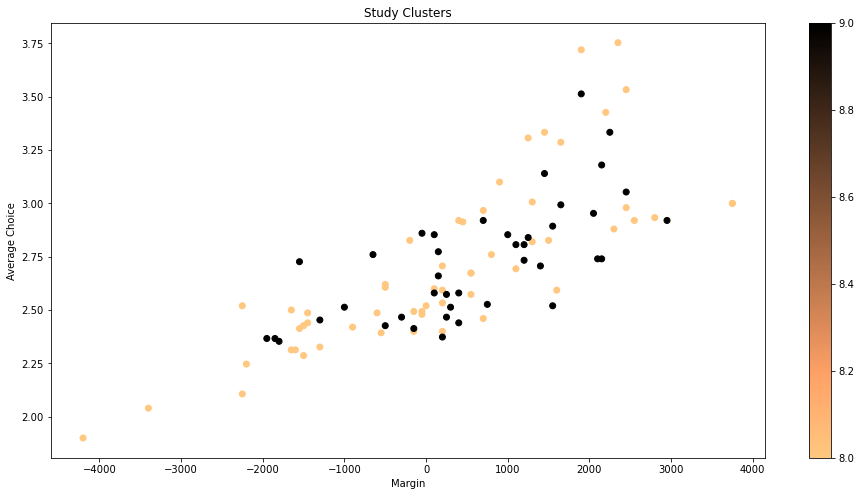

In [14]:
replacements150 = {
  r'Steingroever2011': 8,
  r'Wetzels': 9, 
}

cleaned150['StudyNumber'] = cleaned150.Study.replace(replacements150, regex=True)
plt.figure(figsize=(16,8))
plt.scatter(cleaned150['Margin'], cleaned150['Average Choice'], c=cleaned150['StudyNumber'], cmap='copper_r')
plt.title("Study Clusters")
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.colorbar()

Looking at this graph we can see how these studies was very profitable with it clear to see from the scatter plot the majority broke even or made money. We can also easily tell which study made more money than the other from this scatter plot too with the vast majority of the Wetzels studies equal or above a profit margin of 0 dollars. The cluster primarily consists of Steingroever2011's subjects which confirms our earlier analysis that this group made little over half the profit of Wetzels study. The central cluster is much more even, with possibly a few more from the Wetzels study than the Steingroever study. Again, the right most cluster has a fairly even split between the two studies with Wetzels subjects claiming some larger profit margins in contrast to the Steingroever study. It is interesting to note both studies had two cards with a payoff in the decks and both appeared to use similiar age demographies (Wetzels used students, Steingroever a mean average age of 19.9 years old). The larger number of subjects used in the Steingroever study could be attributed to why the winnings were larger in the Wetzels study as boh studies had 2 cards that paid out. Definitely from looking at this graph and our other clusters younger age profiles, particularly students, seem to be more profitable in this task. We also can see that an average card choice of between 3 and 3.25 appears most profitable from our 3 cluster analysis. Higher values closer to 4 also pay well but not as well as between the aforementioned range, while an average value of under 2.5 is detrimental to participants.  

## Elbow Method

In [51]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cleaned100[['Margin', 'Average Choice', 'Most Common Choice']])
    distortions.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


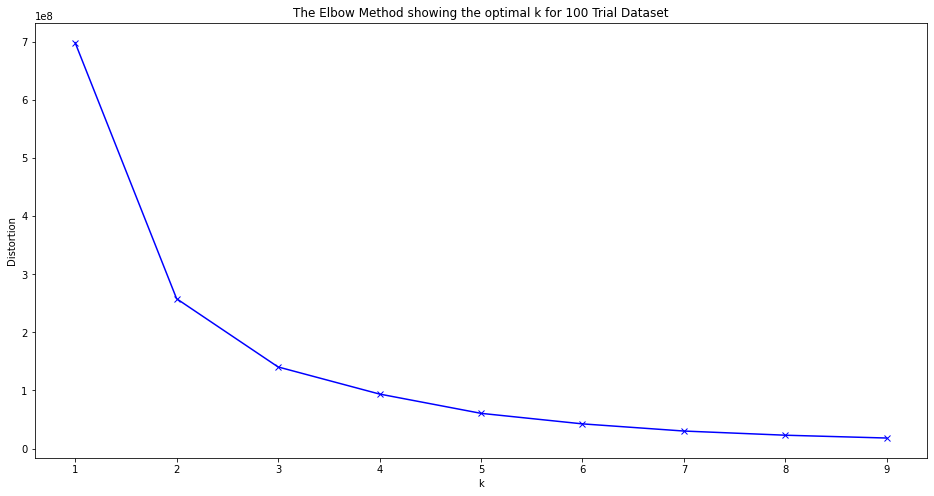

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 100 Trial Dataset')
plt.show()

From the elbow method graph above, we can see that the optimal number of clusters is K=3 for the 100 trial dataset. 

In [17]:
sse_values = []
Z = range(1,10)
for k in Z:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cleaned150)
    sse_values.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


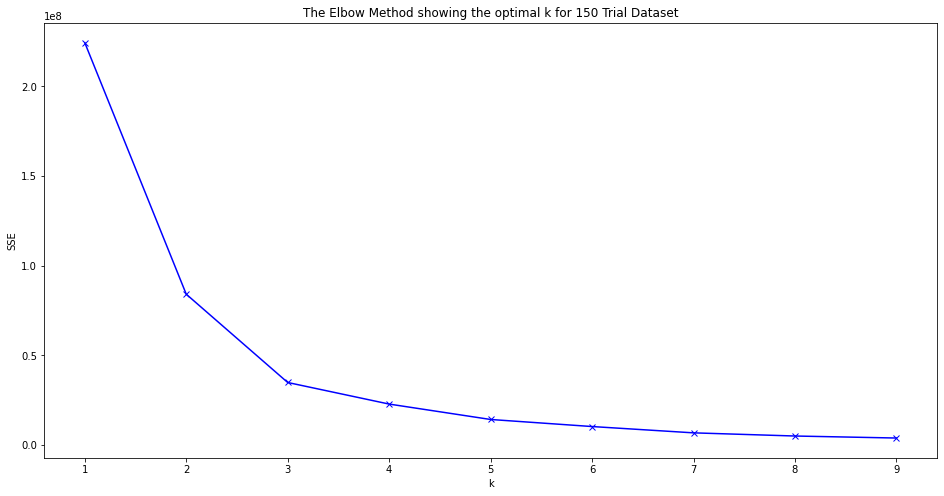

In [19]:
plt.figure(figsize=(16,8))
plt.plot(Z, sse_values, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k for 150 Trial Dataset')
plt.show()

Again, we can see that the optimal number of clusters for our 150 trial dataset is K=3. 

## Silhouette Scores Analysis
### Silhouette Scores for cleaned 100 dataset
We now use another metric to test for the optimal number of clusters in our datasets. We try the silhouette coefficient which calculates the robustness of a clustering technique. The score scales from -1 to 1. 1 means the clusters are very distinguished and perfectly easy to identify, 0 means the clusters are indifferent or hard to identify and -1 means the clusters are assigned in the wrong way. We will try to use this with our earlier elbow coefficient to confirm the optimal number of clusters for our datasets.

In [60]:
for n in range(2, 11):
    km = KMeans(n_clusters=n, random_state=42)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(cleaned100[['Margin', 'Average Choice', 'Most Common Choice', 'Most Common Choice Picked']])
#
# Calculate Silhoutte Score
#
    score = silhouette_score(cleaned100[['Margin', 'Average Choice', 'Most Common Choice']], km.labels_, metric='euclidean')
#
# Print the score
#
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.558
N = 3 Silhouette Score: 0.532
N = 4 Silhouette Score: 0.511
N = 5 Silhouette Score: 0.535
N = 6 Silhouette Score: 0.551
N = 7 Silhouette Score: 0.550
N = 8 Silhouette Score: 0.544
N = 9 Silhouette Score: 0.544
N = 10 Silhouette Score: 0.551


We see here there is not much to split the silhouette coefficient scores from range 2 to 10. It peaks at values of N = 2, 6 or 7. Using our previous elbow analysis of this data it is safe to conclude that using using 2 or 3 clusters provides optimal analysis of this data.

### Silhouette Scores for 150 Trial Dataset

In [61]:
for n in range(2, 11):
    km = KMeans(n_clusters=n, random_state=42)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(cleaned150[['Margin', 'Average Choice', 'Most Common Choice', 'Most Common Choice Picked']])
#
# Calculate Silhoutte Score
#
    score = silhouette_score(cleaned150[['Margin', 'Average Choice', 'Most Common Choice']], km.labels_, metric='euclidean')
#
# Print the score
#
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.537
N = 3 Silhouette Score: 0.605
N = 4 Silhouette Score: 0.584
N = 5 Silhouette Score: 0.602
N = 6 Silhouette Score: 0.575
N = 7 Silhouette Score: 0.591
N = 8 Silhouette Score: 0.601
N = 9 Silhouette Score: 0.602
N = 10 Silhouette Score: 0.581


We see the optimal values to use for number of clusters as part of this dataset are either N = 3,5,8 or 9. We use N = 3 as this also aligns with the elbow coefficient and produces the marginally better result in dataset.

In [56]:
joined = pd.read_csv('Data/cleaned_all.csv', index_col='Unnamed: 0')
joined.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber
Subj_1,1150,71,4,3.400000,0
Subj_2,-675,33,4,2.568421,0
Subj_3,-750,38,4,2.778947,0
Subj_4,-525,38,4,2.810526,0
Subj_5,100,46,4,3.021053,0


In [57]:
for n in range(2, 11):
    km = KMeans(n_clusters=n, random_state=42)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(joined)
#
# Calculate Silhoutte Score
#
    score = silhouette_score(joined, km.labels_, metric='euclidean')
#
# Print the score
#
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.552
N = 3 Silhouette Score: 0.531
N = 4 Silhouette Score: 0.521
N = 5 Silhouette Score: 0.528
N = 6 Silhouette Score: 0.544
N = 7 Silhouette Score: 0.554
N = 8 Silhouette Score: 0.542
N = 9 Silhouette Score: 0.547
N = 10 Silhouette Score: 0.541


In [62]:
distortions_joined = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(joined)
    distortions_joined.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


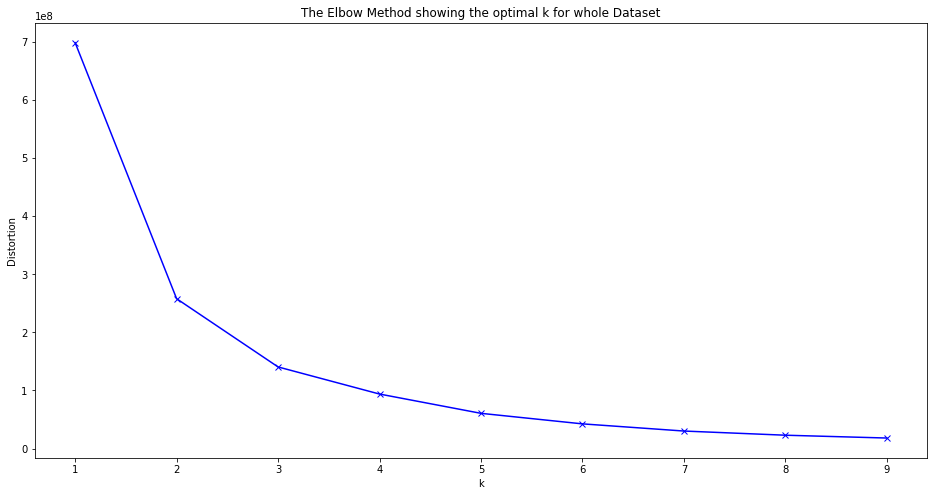

In [63]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for whole Dataset')
plt.show()

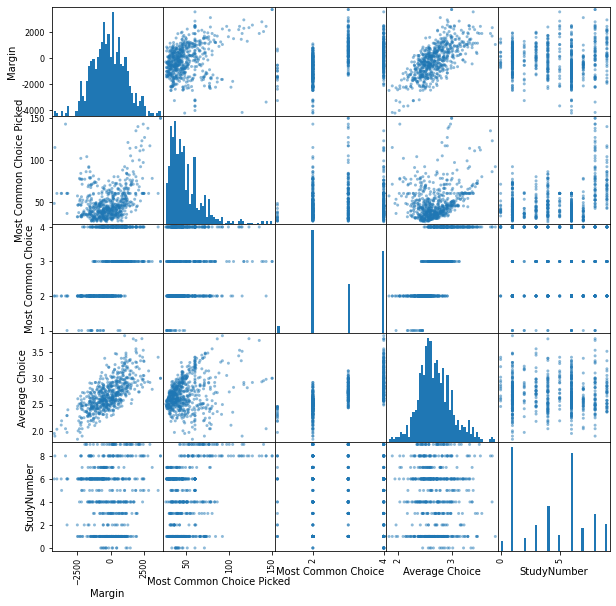

In [58]:
pd.plotting.scatter_matrix(joined, figsize=(10,10), hist_kwds=dict(bins=50), cmap="Set1")
plt.show()

After looking at this scatterplot comparing the various columns against each other in a scatter plot I felt it might be worth looking into how regularly a participant picked their most common choice and the profit margins. We could further look into this by looking at what was their most common choice and the respective study they belonged to.

In [66]:
kmeans_margin_joined = KMeans(n_clusters=3).fit(joined[["Margin", "Most Common Choice Picked"]])
centroids_betas_joined = kmeans_margin_joined.cluster_centers_

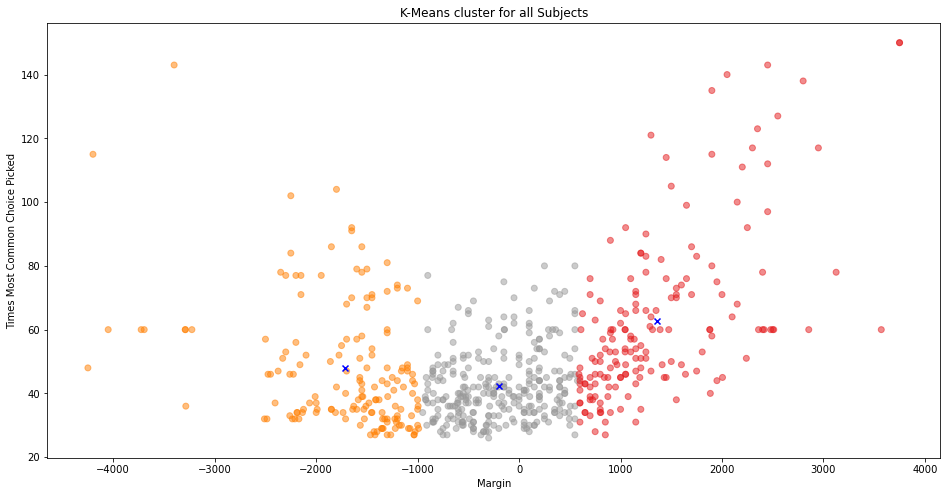

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(joined['Margin'], joined['Most Common Choice Picked'], c= kmeans_margin_joined.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_joined[:, 0], centroids_betas_joined[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for all Subjects')
plt.xlabel('Margin')
plt.ylabel('Times Most Common Choice Picked')
plt.show()